# SQL _(1h30)_

> 1. **Modèle de données:** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.

Schéma de la base de données :


Livre (<u>LivreID</u>, Titre, *AuteurID*)

Auteur (<u>AuteurID</u>, Nom, Prénom)

Genre (<u>GenreID</u>, Nom)

LivreGenre (<u>*LivreID*</u>, <u>*GenreID*</u>)

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

Livre - Auteur :
Clé primaire: Auteur[AuteurID]
Clé étrangère: Livre[AuteurID]


LivreGenre - Livre
Clé primaire : Livre[LivreID]
Clé étrangère : LivreGenre[LivreID]

LivreGenre - Genre
Clé primaire : Genre[GenreID]
Clé étrangère : LivreGenre[GenreID]

> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiare ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



Réponse:
Oui, la table intermédiaire est **LivreGenre (LivreID, GenreID)**.
C'est recommandé quand une table peut être lié à plusieurs enregistrements d'une autre table et réciproquement


3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/MaskiVal/Html/raw/main/biblio_F.sqlite3.zip")

open('biblio_F.sqlite3.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("biblio_F.sqlite3.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('biblio_F.sqlite3')



Voici une représentation des valeurs de votre base de données :

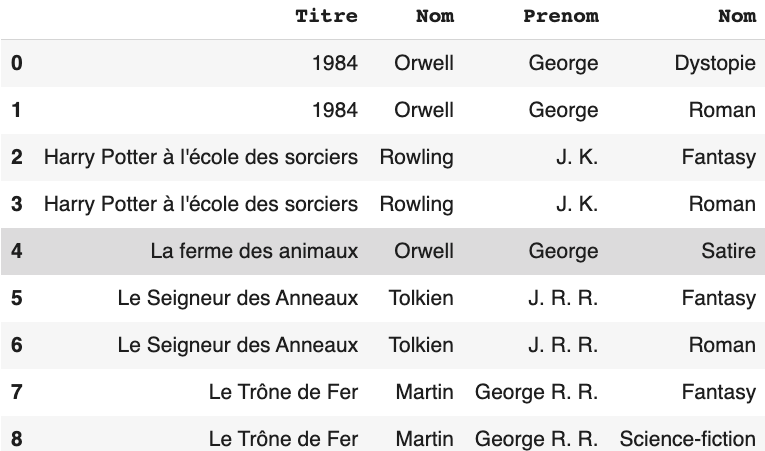

In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("""SELECT * FROM Auteur""", conn)

,AuteurID,Nom,Prenom
0,1,Martin,George R. R.
1,2,Rowling,J. K.
2,3,Tolkien,J. R. R.
3,4,Orwell,George


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 Renvoyer le nom du genre qui contient le plus de livres, ainsi que le nombre de livres pour ce genre.

Résultat attendu:  
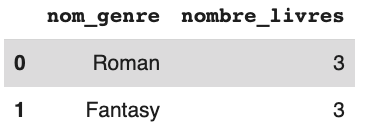

In [3]:
pd.read_sql(""" SELECT g.Nom AS nom_genre, COUNT(l.LivreID) AS nombre_livres
                FROM Livre l
                INNER JOIN LivreGenre lg ON l.LivreID = lg.LivreID
                INNER JOIN Genre g ON lg.GenreID = g.GenreID
                GROUP BY g.Nom
                ORDER BY nombre_livres DESC
                LIMIT 2
                """, conn)

,nom_genre,nombre_livres
0,Roman,3
1,Fantasy,3


> 3.2 Renvoyer le nombre de livres et d'auteurs par genre, dans l'ordre décroissant par rapport au nombre de livres.


Résultat attendu:
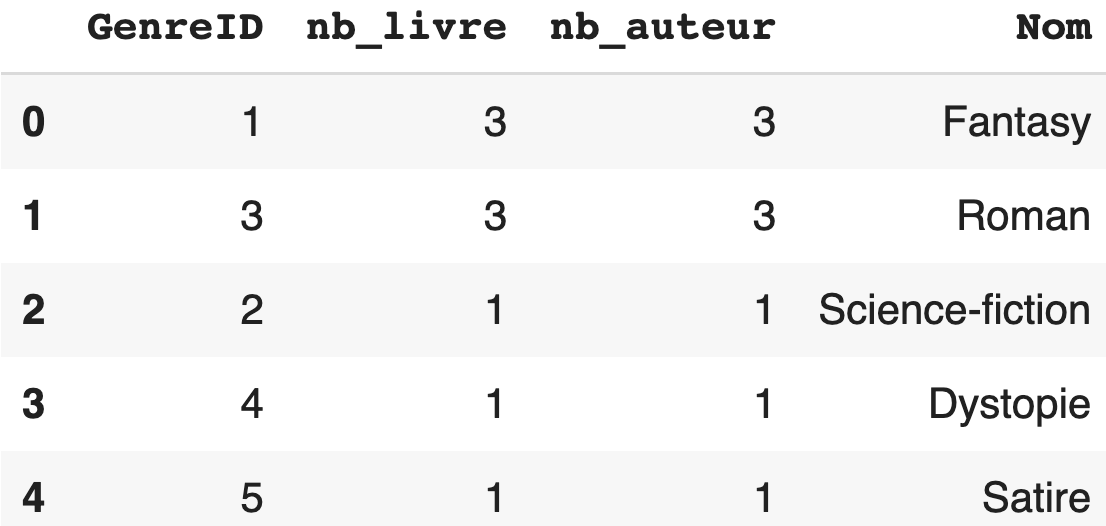

In [4]:
pd.read_sql(""" SELECT g.GenreID, COUNT(l.LivreID) AS nb_livre, COUNT(a.AuteurID) AS nb_auteur, g.Nom
                FROM Livre l
                INNER JOIN LivreGenre lg ON l.LivreID = lg.LivreID
                INNER JOIN Genre g ON lg.GenreID = g.GenreID
                INNER JOIN Auteur a ON l.AuteurID = a.AuteurID
                GROUP BY g.Nom
                ORDER BY nb_livre DESC, g.GenreID ASC
                """, conn)

,GenreID,nb_livre,nb_auteur,Nom
0,1,3,3,Fantasy
1,3,3,3,Roman
2,2,1,1,Science-fiction
3,4,1,1,Dystopie
4,5,1,1,Satire


> 3.3 Créer une requête qui renvoie le nombre de genres distincts dans la table Genre.

Résultat attendu:

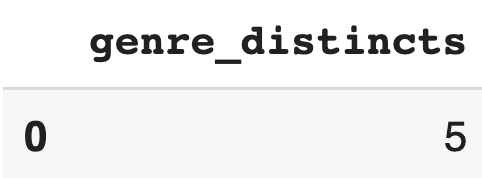

In [5]:
pd.read_sql(""" SELECT COUNT(DISTINCT GenreID) AS genre_distincts
                FROM Genre""", conn)

,genre_distincts
0,5


> 3.4. La bibliothèque souhaite investir dans les auteurs les plus populaires, basé sur le nombre de livres qu'ils ont écrits. Combien de livres a écrit l'auteur le plus prolifique ?

Résultat attendu:

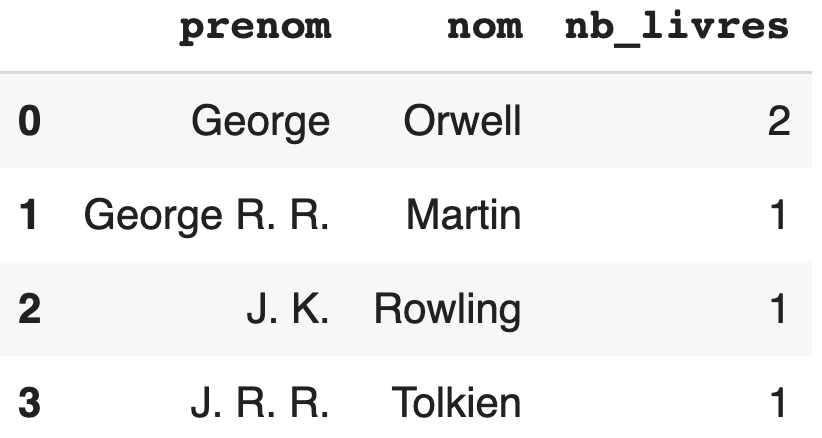

In [6]:
pd.read_sql(""" SELECT a.Prenom, a.Nom, COUNT(LivreID) AS nb_livres
                FROM Auteur a
                INNER JOIN Livre l ON a.AuteurID = l.AuteurID
                GROUP BY a.Prenom, a.Nom
                ORDER BY nb_livres DESC
                 """, conn)

,Prenom,Nom,nb_livres
0,George,Orwell,2
1,George R. R.,Martin,1
2,J. K.,Rowling,1
3,J. R. R.,Tolkien,1


> 3.5 : Trouvez les auteurs qui ont écrit plus d'un livre dans plus d'un genre. Classez-les par ordre décroissant du nombre de livres distincts qu'ils ont écrits, puis par ordre décroissant du nombre de genres distincts dans lesquels ils ont écrit ?.

Résultat attendu:

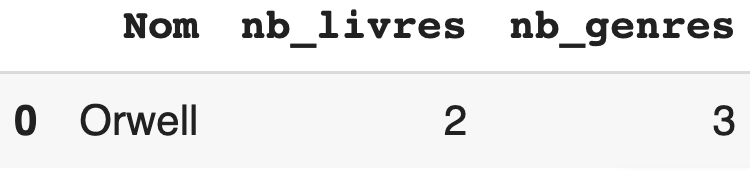

In [7]:
pd.read_sql(""" SELECT a.Nom, COUNT(DISTINCT l.LivreID) AS nb_livres, COUNT(DISTINCT g.GenreID) AS nb_genres
                FROM Livre l
                INNER JOIN LivreGenre lg ON l.LivreID = lg.LivreID
                INNER JOIN Genre g ON lg.GenreID = g.GenreID
                INNER JOIN Auteur a ON l.AuteurID = a.AuteurID
                GROUP BY a.Nom
                ORDER BY nb_livres DESC, nb_genres DESC
                LIMIT 1
                """, conn)

,Nom,nb_livres,nb_genres
0,Orwell,2,3


---

    

---

# Pandas _(3h30)_


---



# Importation et pré-traitement d'un dataset
---



*Le jeu de données à analyser se trouve à l'adresse suivante : (https://divvy-tripdata.s3.amazonaws.com/index.html). Il y a un fichier par mois, pour un total de 12 fichiers. Chaque fichier contient 13 colonnes avec des types de données variés. Nous allons fusionner les fichiers en un seul et le nommer 'combined_data'.*

In [8]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import datetime
import requests
import zipfile
import io
import os
from math import radians, sin, cos, sqrt, atan2

In [9]:
####### Importation des datasets depuis le serveur AWS dédiéc (A EXECUTER UNE SEULE FOIS !!!!)

# Liste des noms de fichiers
file_names = [
    "202101-divvy-tripdata.zip",
    "202102-divvy-tripdata.zip",
    "202103-divvy-tripdata.zip",
    "202104-divvy-tripdata.zip",
    "202105-divvy-tripdata.zip",
    "202106-divvy-tripdata.zip",
    "202107-divvy-tripdata.zip",
    "202108-divvy-tripdata.zip",
    "202109-divvy-tripdata.zip",
    "202110-divvy-tripdata.zip",
    "202111-divvy-tripdata.zip",
    "202112-divvy-tripdata.zip"
]

# URL de base
base_url = "https://divvy-tripdata.s3.amazonaws.com/"

# Télécharger chaque fichier
for file_name in file_names:

    url = base_url + file_name
    response = requests.get(url)

    # Extraire le fichier Zip dans le dossier local "wild_divvy_data"
    with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
      the_zip.extractall("wild_divvy_data")


In [10]:
folder_path = 'wild_divvy_data'

# Obtenir une liste de tous les fichiers CSV dans le dossier local
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialiser un DataFrame vide pour stocker les données combinées
combined_data = pd.DataFrame()

# Parcourir chaque fichier CSV et concaténer ses données au DataFrame combiné
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Afficher les données combinées
combined_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


Pré-traitement
---



1. Afficher les types des colonnes

In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


2. Afficher le nombre de valeurs manquantes par colonne

In [12]:
combined_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

3. Identifier et compter les lignes dupliquées pour toutes les colonnes

In [13]:
combined_data.duplicated().sum()

0

## Traitement

*Commentaire :*

4. Créer une nouvelle dataframe en supprimant tous les trajets avec des valeurs manquantes et afficher le nombre de lignes et de colonnes de la nouvelle dataframe

In [14]:
dataset = combined_data.dropna()
dataset.shape

(4588302, 13)

## Colonnes supplémentaires et transformation des données

Nous ajouterons la distance parcourue en kilomètres à partir des latitudes et longitudes de départ et d'arrivée données. Nous utiliserons la formule de Haversine.

In [15]:
def haversine(lat1, lon1, lat2, lon2):
# Rayon de la Terre en kilomètres
    R = 6371.0

    # Convertir la latitude et la longitude de degrés en radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculer les différences entre les latitudes et les longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Formule de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculer la distance
    distance = R * c

    return distance


5. Ajouter une nouvelle colonne "distance_travelled_km" en appliquant la fonction haversine sur tous les trajets.

> On rappelle le prototype de la fonction haversine(lat1, lon1, lat2, lon2)



In [16]:
dataset['distance_travelled_km'] = dataset.apply(
    lambda x: haversine(x.start_lat, x.start_lng, x.end_lat, x.end_lng),
    axis=1
)
dataset.head()

C:\Users\Nitropc\AppData\Local\Temp\ipykernel_15916\252139128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['distance_travelled_km'] = dataset.apply(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.032303
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.115287
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.032911
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.035544
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.032303


6. Analyser les statistiques concernant la colonne "distance_travelled_km".

Que remarquez vous?

In [17]:
dataset['distance_travelled_km'].describe()

count    4.588302e+06
mean     2.128845e+00
std      1.879802e+00
min      0.000000e+00
25%      9.038498e-01
50%      1.619725e+00
75%      2.814214e+00
max      3.380018e+01
Name: distance_travelled_km, dtype: float64

*Réponse :* On remarque qu'il y a des trajets qui ont 0Km de distance parcourus

7. Pour remédier à ce problèm, ajouter une nouvelle colonne "ride_duration_s" pour calculer la période du trajet en secondes

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588302 entries, 9 to 5595062
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ride_id                object 
 1   rideable_type          object 
 2   started_at             object 
 3   ended_at               object 
 4   start_station_name     object 
 5   start_station_id       object 
 6   end_station_name       object 
 7   end_station_id         object 
 8   start_lat              float64
 9   start_lng              float64
 10  end_lat                float64
 11  end_lng                float64
 12  member_casual          object 
 13  distance_travelled_km  float64
dtypes: float64(5), object(9)
memory usage: 525.1+ MB


In [19]:
dataset['started_at'] = pd.to_datetime(dataset['started_at'])
dataset['ended_at'] = pd.to_datetime(dataset['ended_at'])

C:\Users\Nitropc\AppData\Local\Temp\ipykernel_15916\2630089736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['started_at'] = pd.to_datetime(dataset['started_at'])
C:\Users\Nitropc\AppData\Local\Temp\ipykernel_15916\2630089736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ended_at'] = pd.to_datetime(dataset['ended_at'])


In [ ]:
dataset['ride_duration_s'] = (dataset['ended_at'] - 
                              dataset['started_at']).dt.total_seconds()
dataset.head()

C:\Users\Nitropc\AppData\Local\Temp\ipykernel_15916\1133841936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ride_duration_s'] = (dataset['ended_at'] - dataset['started_at']).dt.total_seconds()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.032303,433.0
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.115287,272.0
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.032911,587.0
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.035544,537.0
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.032303,609.0


8. Analyser les statistiques concernant la colonne "ride_duration_s".

Que remarquez vous?

In [21]:
dataset['ride_duration_s'].describe()

count    4.588302e+06
mean     1.308638e+03
std      1.106550e+04
min     -3.354000e+03
25%      4.170000e+02
50%      7.320000e+02
75%      1.327000e+03
max      3.356649e+06
Name: ride_duration_s, dtype: float64

*Réponse :* On a des trajets avec des valeurs négatives...

9. Supprimer les trajets de moins d'une minute

In [22]:
dataset = dataset[dataset['ride_duration_s'] >= 60]
dataset.shape

(4528933, 15)

10. Créer une colonne "speed_mph" afin d'analyser la vitesse en calculant la vitesse du km/h vers mph.



In [23]:
dataset['speed_kmh'] = (dataset['distance_travelled_km'] / dataset['ride_duration_s']) * 3600

dataset['speed_mph'] = dataset['speed_kmh'] * 0.621371


In [24]:
dataset['speed_mph'].describe()

count    4.528933e+06
mean     5.790966e+00
std      2.945404e+00
min      0.000000e+00
25%      4.122913e+00
50%      6.096761e+00
75%      7.738143e+00
max      4.223214e+01
Name: speed_mph, dtype: float64

11. Supprimer les données avec une vitesse supérieure à 45 km/h (~28 mph, vitesse maximale des vélos aux États-Unis).

In [25]:
df = dataset[dataset['speed_kmh'] < 45]
df.shape


(4528930, 17)

12. Supprimer les colonnes ("ride_id" et "speed_mph") pour un chargement plus rapide

In [26]:
df.drop(columns= ['ride_id', 'speed_mph'], inplace=True)

C:\Users\Nitropc\AppData\Local\Temp\ipykernel_15916\1501337712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= ['ride_id', 'speed_mph'], inplace=True)


In [27]:
df.shape

(4528930, 15)

13. * Supprimer les espaces de fin pour les colonnes de type chaîne de caractères.

  * Il y a des données qui sont des trajets de test (avec 'test' inclus dans le nom de la station et l'identifiant de la station). Nous supprimerons également ces données.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4528930 entries, 9 to 5595062
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   rideable_type          object        
 1   started_at             datetime64[ns]
 2   ended_at               datetime64[ns]
 3   start_station_name     object        
 4   start_station_id       object        
 5   end_station_name       object        
 6   end_station_id         object        
 7   start_lat              float64       
 8   start_lng              float64       
 9   end_lat                float64       
 10  end_lng                float64       
 11  member_casual          object        
 12  distance_travelled_km  float64       
 13  ride_duration_s        float64       
 14  speed_kmh              float64       
dtypes: datetime64[ns](2), float64(7), object(6)
memory usage: 552.8+ MB


In [29]:
cols_to_strip = df.select_dtypes(include=object).columns

df[cols_to_strip] = df[cols_to_strip].apply(lambda x: x.str.strip())

C:\Users\Nitropc\AppData\Local\Temp\ipykernel_15916\3352719213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_strip] = df[cols_to_strip].apply(lambda x: x.str.strip())


In [30]:
df = df[
    ~df['start_station_name'].str.contains("test", case=False, na=False) &
    ~df['start_station_id'].str.contains("test", case=False, na=False) &
    ~df['end_station_name'].str.contains("test", case=False, na=False) &
    ~df['end_station_id'].str.contains("test", case=False, na=False)
]

In [31]:
df.shape



(4528312, 15)

14. Ajouter les catégories suivantes pour découvrir les motifs basés sur le temps :

* day_of_week : Lundi, Mardi, Mercredi, etc.
* day_type : Jour de semaine ou Week-end
* month : Janvier, Février, Mars, etc.
* season : Hiver, Printemps, Été, Automne

    **Créer une fonction pour day_type**

    **Créer une fonction pour season**

In [32]:
# Traitement 'day_of_week' et 'month'
df['day_of_week'] = df['started_at'].dt.day_name()
df['month'] = df['started_at'].dt.month_name()
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_kmh,day_of_week,month
9,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.032303,433.0,16.896742,Sunday,January
10,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.115287,272.0,14.761151,Saturday,January
11,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.032911,587.0,12.467597,Saturday,January
12,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.035544,537.0,13.646105,Saturday,January
13,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.032303,609.0,12.013611,Sunday,January


In [33]:
#Fonction pour 'day_type'
def day_type_func(day:str):
  semaine = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
  if day in semaine:
    return 'Weekday'
  else:
    return 'Weekend'

In [34]:
#Application de la fonction pour 'day_type'
df['day_type'] = df['day_of_week'].apply(day_type_func)
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_kmh,day_of_week,month,day_type
9,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.032303,433.0,16.896742,Sunday,January,Weekend
10,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.115287,272.0,14.761151,Saturday,January,Weekend
11,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.032911,587.0,12.467597,Saturday,January,Weekend
12,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.035544,537.0,13.646105,Saturday,January,Weekend
13,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.032303,609.0,12.013611,Sunday,January,Weekend


In [35]:
#Fonction pour 'season'
def season_func(month:str):
  hiver = ['December', 'January', 'February']
  ete = ['June', 'July', 'August']
  automne = ['September', 'October', 'November']
  printemps = ['March', 'April', 'May']

  if month in hiver:
    return 'Winter'
  elif month in ete:
    return 'Summer'
  elif month in automne:
    return 'Autumn'
  else:
    return 'Spring'

In [36]:
#Application de la fonction pour 'season'
df['season'] = df['month'].apply(season_func)
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_kmh,day_of_week,month,day_type,season
9,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.032303,433.0,16.896742,Sunday,January,Weekend,Winter
10,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.115287,272.0,14.761151,Saturday,January,Weekend,Winter
11,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.032911,587.0,12.467597,Saturday,January,Weekend,Winter
12,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.035544,537.0,13.646105,Saturday,January,Weekend,Winter
13,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.032303,609.0,12.013611,Sunday,January,Weekend,Winter


15. Ajouter la colonne 'route_type' (même 'start_station_name' et 'end_station_name') pour classifier les trajets comme trajet aller-retour ou trajet aller simple.

In [37]:
#Fonction for 'route_type'
def route_type_func(start, end):
  if start == end:
    return 'Round-rip'
  else:
    return 'One-way trip'

In [38]:
#Application 'route_type'
df['route_type'] = df.apply(lambda x: route_type_func(x.start_station_name, x.end_station_name), axis=1)
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_travelled_km,ride_duration_s,speed_kmh,day_of_week,month,day_type,season,route_type
9,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,2.032303,433.0,16.896742,Sunday,January,Weekend,Winter,One-way trip
10,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,1.115287,272.0,14.761151,Saturday,January,Weekend,Winter,One-way trip
11,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,2.032911,587.0,12.467597,Saturday,January,Weekend,Winter,One-way trip
12,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,2.035544,537.0,13.646105,Saturday,January,Weekend,Winter,One-way trip
13,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,2.032303,609.0,12.013611,Sunday,January,Weekend,Winter,One-way trip


16. Ajouter la colonne "ride_duration_min" qui représente la durée du trajet en minutes.

In [39]:
df['ride_duration_min'] = df['ride_duration_s'] / 60

17. Renommer tes colonnes pour qu'elles soient pretes pour la dataViz

In [40]:
df.rename(columns={
    'rideable_type' : 'bike_type',
    'member_casual' : 'user_type',
    'started_at' : 'start_time',
    'ended_at' : 'end_time',
    'day_of_week' : 'day_of_week',
    'day_type' : 'day_type',
    'month' : 'month',
    'season' : 'season',
    'start_station_name' : 'start_station_name',
    'end_station_name' : 'end_station_name',
    'route_type' : 'route_type',
    'start_lat' : 'start_lat',
    'start_lng' : 'start_lng',
    'end_lat' : 'end_lat',
    'end_lng' : 'end_lng',
    'distance_travelled_km' : 'distance_travelled_km',
    'ride_duration_s' : 'ride_duration_s',
    'ride_duration_min' : 'ride_duration_min'

}, inplace=True)
cols = ['bike_type',	'user_type',	'start_time',	'end_time',	'day_of_week',	'day_type',	'month',	'season',	'start_station_name',	'end_station_name',	'route_type',	'start_lat',	'start_lng',	'end_lat',	'end_lng',	'distance_travelled_km',	'ride_duration_s',	'ride_duration_min']
df = df[cols]
df.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
9,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
10,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
11,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
12,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
13,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


18. Vérifier les caractéristiques des dataframes avant l'export du dataset nettoyé

In [41]:
df.shape

(4528312, 18)

## Extraire le dataframe pour l'analyse

19. Exporter le dataframe pour l'utiliser par la suite dans ton Notebook d'analyse

In [42]:
#Extract csv file (SI BESOIN)
#from google.colab import files
df.to_csv('df_cyclistic_clean.csv', index=False)
#files.download('df_cyclistic_clean.csv')

# Machine learning : Régression et Classification (2h)

Ce notebook est un examen pratique pour évaluer vos compétences en :
- Régression linéaire
- Classification

Complétez chaque section en suivant les consignes données.

## Importer les bibliothèques nécessaires
Importez les bibliothèques pandas, numpy, matplotlib, seaborn et scikit-learn.

In [43]:
# Correction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# 1. Régression Linéaire : Prédire `distance_travelled_km`

Sélectionnez les bonnes variables explicatives et entraînez un modèle de régression linéaire.

## Charger les données (CONSEILLE DE LE CHARGER AVEC VISUAL CODE / 2 minutes de chargement environ)
Chargez le fichier CSV depuis l'URL publique et affichez les premières lignes.

In [44]:

# Correction
file_url = "https://storage.googleapis.com/dataset-storage-chicago-cyclist-csv/cyclistic_clean.csv"
chunk_size = 500000  # Nombre de lignes par chunk
chunks = pd.read_csv(file_url, chunksize=chunk_size)

df_list = []
for chunk in chunks: # Ex. filtrer les trajets avec distance > 0
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)
df.shape

(4528312, 18)

In [45]:
df.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


### Étape 1: Sélection de lignes de dataframe par condition (Les trajets d'une durée de plus de 5 minutes)

In [46]:
df.columns

Index(['bike_type', 'user_type', 'start_time', 'end_time', 'day_of_week',
       'day_type', 'month', 'season', 'start_station_name', 'end_station_name',
       'route_type', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance_travelled_km', 'ride_duration_s', 'ride_duration_min'],
      dtype='object')

In [47]:
# Sélection des trajets de plus de 5 minutes
df = df[df['ride_duration_min'] > 5]
df.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000
5,electric_bike,member,2021-01-22 15:15:28,2021-01-22 15:36:01,Friday,Weekday,January,Winter,California Ave & Cortez St,Wells St & Elm St,One-way trip,41.900373,-87.696790,41.903272,-87.634457,5.168809,1233.0,20.550000


### Étape 2: Feature Engineering (Choix des variables à conserver)

In [48]:
# Choix des variables pertinentes
selected_features = ['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'day_of_week', 'month', 'season', 'user_type', 'bike_type']
df_clean = df[selected_features]
df_clean.head()

,distance_travelled_km,ride_duration_min,start_lat,start_lng,end_lat,end_lng,day_of_week,month,season,user_type,bike_type
0,2.032303,7.216667,41.900363,-87.696704,41.899181,-87.672200,Sunday,January,Winter,member,classic_bike
2,2.032911,9.783333,41.900374,-87.696688,41.899180,-87.672178,Saturday,January,Winter,casual,electric_bike
3,2.035544,8.950000,41.900379,-87.696716,41.899149,-87.672177,Saturday,January,Winter,casual,electric_bike
4,2.032303,10.150000,41.900363,-87.696704,41.899181,-87.672200,Sunday,January,Winter,casual,classic_bike
5,5.168809,20.550000,41.900373,-87.696790,41.903272,-87.634457,Friday,January,Winter,member,electric_bike


### Étape 3: Création des variables X et y ( Sélectionne que les variables numériques)

In [49]:
# Définition des variables X et y
numerical_df = df_clean.select_dtypes(include='number')

X = numerical_df.drop('distance_travelled_km', axis=1)
y = numerical_df['distance_travelled_km']

### Étape 4: Séparer les jeux d'entraînement et les jeux de test (jeu de test à 20% et random_state = 42)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Étape 5: Choisir et importer un algorithme de ML (Algorithme de régression linéaire)

In [51]:
from sklearn.linear_model import LinearRegression
# Importation d'un modèle de régression linéaire
model = LinearRegression()

### Étape 6: Entraînement du modèle

In [52]:
# Entrainement du modèle de régression linéaire
model.fit(X_train, y_train)

LinearRegression()

### Étape 7: Effectuez les prédictions sur les données de test

In [53]:
# Prédictions de la distance en km par rapport au jeu de test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### Étape 8: Evaluez le modèle et intéprétez les résultats

Calculez le coefficient de détermination R² pour le jeu d'entrainement et puis pour le jeu de test

In [54]:
# Correction
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"R² sur le jeu d'entraînement : {r2_train}")
print(f"R² sur le jeu de test : {r2_test}")

R² sur le jeu d'entraînement : 0.013421079831071658
R² sur le jeu de test : 0.013580496597647373


Interprètez les résultats et vérifiez est ce que le modèle à un problème de surajustement(over-fitting) ou sousajustement(under-fitting), commentez votre constatation.

In [55]:
# Ton intéprétation : 
# Le modèle présente des performances très faibles, avec un R² d’environ 0.013 sur les jeux d’entraînement et de test.
# Cela indique un sous-ajustement, le modèle n’arrive pas à apprendre correctement la relation entre les variables explicatives et la variable cible.


Calculez le R²

In [56]:
# R² score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_test)
print(r2_score)

0.013580496597647373


Interprètez cette métrique

In [57]:
# Ton intéprétation du R² score : ?
# Le coefficient de détermination R² = 0.0136 indique que le modèle n'explique qu’environ 1,36 % de la variabilité de la variable cible
# Cela signifie que les prédictions du modèle sont très proches de la moyenne, et qu’il ne parvient pas à capturer efficacement les relations entre les variables d’entrée et la sortie.



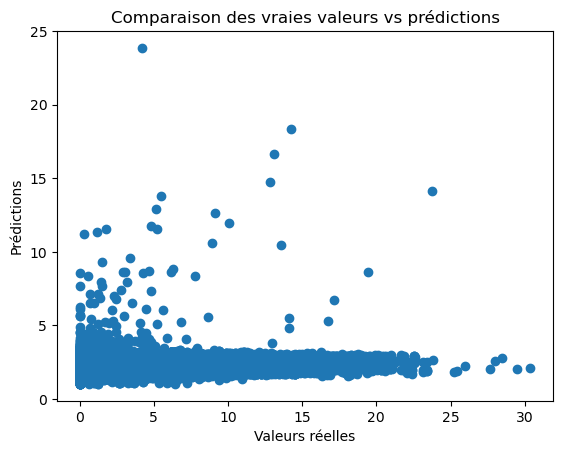

In [58]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des vraies valeurs vs prédictions")
plt.show()

Calculez la Moyenne des écarts absolus au carré (Mean Squared Error (MSE)) et faites la racine du résultat, que pouvez vous intépréter de ce résultat ?

In [59]:
from sklearn.metrics import mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred_test)
print("Moyenne des écarts absolus au carré (Mean Squared Error (MSE)):", mse)

Moyenne des écarts absolus au carré (Mean Squared Error (MSE)): 3.6045491155391787


In [60]:
print("Moyenne des écarts absolus :", np.mean(np.abs(y_pred_test - y_test)))


Moyenne des écarts absolus : 1.350529486899047


Votre intéprétation :

In [61]:
# Concernant la MEA : En moyenne, les prédictions du modèle s’écartent de 1,35 km de la vraie distance parcourue.
# Concernant le MSE : Elle est élevée au regard d’une distance typique si les trajets sont courts
# Comme le R² est très faible (≈ 0.01), le MSE et la MEA confirment que les prédictions restent globalement peu fiables, même si pas catastrophiques en moyenne.

Calculez la corrélation entre `distance_travelled_km` et les autres variables

In [62]:
correlations = df.corr(numeric_only=True)

corr_with_target = correlations['distance_travelled_km'].sort_values(ascending=False)

corr_with_target


distance_travelled_km    1.000000
end_lat                  0.099870
start_lat                0.090138
ride_duration_s          0.033049
ride_duration_min        0.033049
start_lng               -0.082416
end_lng                 -0.091259
Name: distance_travelled_km, dtype: float64

Pouvez-vous expliquer la faible performance en regardant les corrélations entre la variable `distance_travelled_km` et les autres variables

In [63]:
# Votre interprétation : Les variables d’entrée que tu lui donnes sont peu ou pas corrélées à la cible.

### **HORS CERTIFICATION ( ⚠⚠ Executer le code après avoir fini tout l'examen blanc ⚠⚠)**

Ceci n'est pas inclus dans le programme de la certification mais vous permet de comprendre coment résoudre la performance de votre modèle de régression linéaire




La solution serait de choisir un autre modèle qui serait plus puissant à gérer les problématiques de non linéarité des variables et qui pourrait mieux capturer les relations.
On a pris comme exemple le `RandomForestRegressor`, il devrait prendre autour de 2 mins selon les performances de votre machine.

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor

# Création du modèle avec des hyperparamètres optimisés
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Évaluation du modèle sur le jeu de test
r2_score_test = model.score(X_test, y_test)

print(f"R² avec Random Forest : {r2_score_test:.4f}")
"""


R² avec Random Forest : 0.2450


### Étape 9: Expliquer et vulgariser le principe de l'algorithme ML

Votre explication :

?

In [ ]:
"""
Un algorithme de Machine Learning (ou apprentissage automatique) est un programme capable 
d’apprendre à partir des données, sans être explicitement programmé pour chaque situation.

Il observe des exemples (données d’entrée + résultats attendus), puis repère des motifs, 
des relations, et construit un modèle capable de faire des prédictions ou de prendre des 
décisions sur de nouvelles données.

"""

### Étape 10: Les limites et les biais des méthodes utilisées en ML

Expliquez ces problématiques ML :

**Underfitting** : Le modèle est trop simple pour apprendre les tendances des données, il ne les comprend pas bien, ni en entraînement ni en test

**Overfitting** : Le modèle apprend trop bien les détails du jeu d’entraînement, y compris le bruit, ce qui le rend mauvais sur les nouvelles données.



Comment peut-on optimiser les modèles ?

**Optimisation** : Processus qui consiste à améliorer la performance du modèle en ajustant ses paramètres, en choisissant les bonnes variables, 
et en affinant ses réglages pour qu’il généralise bien sur des données jamais vues.

## 2. Classification : Régression Logistique
Entraînez un modèle de régression logistique pour classifier le type de l'utilisateur (la variable `user_type`).

## Charger les données
Chargez le fichier CSV depuis l'URL publique et affichez les premières lignes.

In [ ]:
# Correction
file_url = "https://storage.googleapis.com/dataset-storage-chicago-cyclist-csv/cyclistic_clean.csv"
chunk_size = 500000  # Nombre de lignes par chunk
chunks = pd.read_csv(file_url, chunksize=chunk_size)

df_list = []
for chunk in chunks: # Ex. filtrer les trajets avec distance > 0
    df_list.append(chunk)

df_clean = pd.concat(df_list, ignore_index=True)
df_clean.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


In [ ]:
# Faisons une copie du DataFrame
df_class = df_clean.copy()

### Étape 1: Sélection de lignes de dataframe par condition (Les trajets d'une durée de plus de 10 minutes)

In [ ]:
# Exemple : Sélection des trajets de plus de 10 minutes
df_class = df_class[df_class['ride_duration_min'] > 10]
df_class.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000
5,electric_bike,member,2021-01-22 15:15:28,2021-01-22 15:36:01,Friday,Weekday,January,Winter,California Ave & Cortez St,Wells St & Elm St,One-way trip,41.900373,-87.696790,41.903272,-87.634457,5.168809,1233.0,20.550000
8,electric_bike,member,2021-01-27 07:27:09,2021-01-27 07:45:32,Wednesday,Weekday,January,Winter,California Ave & Cortez St,Damen Ave & Clybourn Ave,One-way trip,41.900313,-87.696792,41.931841,-87.677814,3.841371,1103.0,18.383333
9,electric_bike,member,2021-01-15 08:54:41,2021-01-15 09:11:46,Friday,Weekday,January,Winter,California Ave & Cortez St,Damen Ave & Clybourn Ave,One-way trip,41.900356,-87.696627,41.931922,-87.677856,3.838230,1025.0,17.083333
14,classic_bike,casual,2021-01-22 21:54:15,2021-01-22 22:04:27,Friday,Weekday,January,Winter,California Ave & Cortez St,Honore St & Division St,One-way trip,41.900363,-87.696704,41.903119,-87.673935,1.909151,612.0,10.200000


### Étape 2: Feature Engineering (Choix des variables à conserver)

Gardez que ces colonnes dans votre dataframe :

`['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'month', 'season', 'user_type', 'bike_type']`


In [ ]:
# Choix des variables pertinentes
selected_features = ['distance_travelled_km', 'ride_duration_min', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'month', 'season', 'user_type', 'bike_type']

df_class = df_class[selected_features]
df_class.head()

,distance_travelled_km,ride_duration_min,start_lat,start_lng,end_lat,end_lng,month,season,user_type,bike_type
4,2.032303,10.150000,41.900363,-87.696704,41.899181,-87.672200,January,Winter,casual,classic_bike
5,5.168809,20.550000,41.900373,-87.696790,41.903272,-87.634457,January,Winter,member,electric_bike
8,3.841371,18.383333,41.900313,-87.696792,41.931841,-87.677814,January,Winter,member,electric_bike
9,3.838230,17.083333,41.900356,-87.696627,41.931922,-87.677856,January,Winter,member,electric_bike
14,1.909151,10.200000,41.900363,-87.696704,41.903119,-87.673935,January,Winter,casual,classic_bike


### Étape 3: Création des variables X et y ( Sélectionne que les variables numériques)

Encodez les variables `user_type` et `bike_type` en variables binaires

(Indice : valeur = 0 ou 1 | `factorize()` ou `labelEncoder()`)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Encoder `user_type` (variable cible)
le_user = LabelEncoder()
df_class['user_type_encoded'] = le_user.fit_transform(df_class['user_type'])

# Encoder `bike_type` (comme feature)
le_bike = LabelEncoder()
df_class['bike_type_encoded'] = le_bike.fit_transform(df_class['bike_type'])

Encodez les variables `month` et `season` en transformant les catégories en colonnes binaires

(Indice : chaque valeur = colonne | `getdummies()` ou `OneHotEncoder()`)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# S'assurer que 'month' et 'season' sont de type catégoriel
df_class['month'] = df_class['month'].astype('category')
df_class['season'] = df_class['season'].astype('category')

# Appliquer l'encodage
df_class = pd.concat([
    df_class,
    pd.get_dummies(df_class[['month', 'season']], prefix=['month', 'season'])
], axis=1)

In [ ]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723593 entries, 4 to 4528300
Data columns (total 28 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   distance_travelled_km  float64 
 1   ride_duration_min      float64 
 2   start_lat              float64 
 3   start_lng              float64 
 4   end_lat                float64 
 5   end_lng                float64 
 6   month                  category
 7   season                 category
 8   user_type              object  
 9   bike_type              object  
 10  user_type_encoded      int32   
 11  bike_type_encoded      int32   
 12  month_April            bool    
 13  month_August           bool    
 14  month_December         bool    
 15  month_February         bool    
 16  month_January          bool    
 17  month_July             bool    
 18  month_June             bool    
 19  month_March            bool    
 20  month_May              bool    
 21  month_November         bool    
 22 

Création des variables explicatives (Toutes les variables) X et de la variable expliquée y

In [ ]:
# Définition des variables X et y
X_class = df_class.drop(columns=['month', 'season', 'user_type', 'bike_type', 'user_type_encoded'])
y_class = df_class['user_type_encoded']


### Étape 4: Séparer les jeux d'entraînement et les jeux de test (jeu de test à 20% et random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.20, random_state=42)

### Étape 5: Choisir et importer un algorithme de ML (Algorithme de classification de ton choix)

In [ ]:
from sklearn.linear_model import LogisticRegression 
# Importation d'un modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)

### Étape 6: Entraînement du modèle

In [ ]:
# Entrainement du modèle de régression logistique
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Étape 7: Effectuez les prédictions sur les données de test

In [ ]:
# Prédictions du type des utilisateurs en se basant sur les données du test
y_pred_class = logistic_model.predict(X_test)

### Étape 8: Evaluez le modèle et intéprétez les résultats

Calculez le accuracy_score

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Précision : {accuracy}")
#0.670795...

Précision : 0.6708835197597294


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70    298438
           1       0.63      0.65      0.64    246281

    accuracy                           0.67    544719
   macro avg       0.67      0.67      0.67    544719
weighted avg       0.67      0.67      0.67    544719



Interprètez ces résultats

In [ ]:
# Precision : Le modèle est plus précis quand il prédit la classe 0. (70% contre 63%)
# Recall : Ici aussi, la classe 0 est un peu mieux reconnue, mais c’est assez proche.
# F1-score : Le modèle performe globalement mieux sur la classe 0 que sur la classe 1

### Étape 9: Expliquer et vulgariser le principe d'un algorithme ML de classification (Exemple du KNN)

Votre explication :

In [ ]:
# Un algorithme de classification en machine learning apprend à reconnaître des catégories en analysant les caractéristiques des données.
# Il prédit ensuite à quelle catégorie appartient une nouvelle donnée en comparant ses caractéristiques à celles qu’il a déjà vues




---


# Business Case - CDA - Cyclistic (4h)



---


## Contexte

Cyclistic est une entreprise de partage de vélos à Chicago, qui a depuis élargi son offre pour inclure une flotte de 5 824 vélos géolocalisés stationnés à 692 emplacements à travers Chicago.

Les vélos peuvent être déverrouillés à une station et retournés à n'importe quelle autre station du réseau à tout moment.

Les individus achetant des passes pour une seule course ou pour une journée complète sont considérés comme des cyclistes occasionnels, tandis que ceux qui acquièrent des abonnements annuels sont reconnus comme des membres de Cyclistic.



---


## Votre mission

Tu es un analyste de données junior travaillant dans l'équipe des analystes marketing chez Cyclistic.

Le directeur du marketing pense que le succès futur de l'entreprise dépend de l'augmentation du nombre d'abonnements annuels.

Par conséquent, ton équipe souhaite comprendre comment les cyclistes occasionnels et les membres annuels utilisent différemment les vélos Cyclistic.

À partir de ces informations, ton équipe élaborera une nouvelle stratégie marketing pour convertir les cyclistes occasionnels en membres annuels.

Mais avant cela, les dirigeants de Cyclistic doivent approuver tes recommandations, donc il est essentiel d'avoir des analyses de données convaincantes et des visualisations de données professionnelles.

Il y a trois questions clés qui doivent être répondues à la fin de l'étude de cas :

* Comment les membres annuels et les cyclistes occasionnels utilisent-ils les vélos Cyclistic différemment ?
* Pourquoi les cyclistes occasionnels achèteraient-ils des abonnements annuels Cyclistic ?
* Comment Cyclistic peut-il utiliser les médias numériques pour influencer les cyclistes occasionnels à devenir membres ?
* Où recommenderas-tu à Cyclistic d'implémenter des nouvelles stations pour rendre le service plus disponible ?



---
##Phase 1 : Collecte, pré-traitement et traitement des données

Dans cette phase, tu dois comprendre le processus de génération et de collecte des données, ainsi que reconnaître les différents types, formats et structures de données pour une utilisation efficace dans l'analyse des données. De plus, tu dois veiller à respecter des pratiques éthiques en matière d'analyse de données et traiter les questions de biais et de crédibilité des données.

Vous allez dans un premier temps explorer le jeu de données, dans le but d'explorer plusieurs possibilités de choix. Une fois que votre choix est fait, lancez-vous dans l'élaboration de votre tableau de bord, dans le but de convaincre un maximum les investisseurs.

**Les données sont disponibles publiquement sur un serveur AWS (https://divvy-tripdata.s3.amazonaws.com/index.html)**

Tu as été chargés de travailler avec une année entière de données, **l'année 2021**, donc il faudra récupérer les fichiers (au format CSV) contenant des données de **Janvier 2021 à Décembre 2021, un fichier pour chaque mois**.

**Pensez à bien explorer les différents fichiers et de pouvoir réfélchir à travailler sur toute l'année. Il faudra aussi penser à éliminer tous les trajets qui causent des problèmes techniques en phase de pré-traitement. N'hésitez pas à ajouter des nouvelles colonnes afin de pouvoir mener à bien vos analyses et visualisations**.




---


## **IMPORTANT**

**P.S : PENSE A UTILISER LE FICHIER CSV CLEAN QUE TU AS PU GENERE A LA FIN DE LA PARTIE PANDAS AU LIEU DE RECOMMENCER LE TRAVAILE A 0. CA TE SERIVRA DE BONNE BASE POUR RAJOUTER QUE LES INFOS DONT T'AS BESOIN POUR CONTINUER LE BUSINESS CASE.**

**Tu peux aussi utiliser le code ci-dessous pour récupérer une bonne base de travail ou si tu n'as pas pu terminer la partie Pandas**

In [ ]:
file_url = "https://storage.googleapis.com/dataset-storage-chicago-cyclist-csv/cyclistic_clean.csv"
chunk_size = 500000  # Nombre de lignes par chunk
chunks = pd.read_csv(file_url, chunksize=chunk_size)

df_list = []
for chunk in chunks: # Ex. filtrer les trajets avec distance > 0
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)
df.head()

In [4]:
"""# Exemple d'importation d'un fichier depuis le servers AWS dédié

import requests
import zipfile
import io
import pandas as pd

# Step 1: Télécharger le fichier Zip
url = "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip"
response = requests.get(url)

# Step 2: Extraire le fichier Zip
with zipfile.ZipFile(io.BytesIO(response.content)) as the_zip:
    the_zip.extractall("divvy_data")
"""

import pandas as pd 

# Step 3: Lire le fichier CSV
csv_file_path = "df_cyclistic_clean.csv"
df_janvier_2021 = pd.read_csv(csv_file_path)

# Afficher les 5 premières lignes du fichier csv Janvier 2021
df_janvier_2021.head()

,bike_type,user_type,start_time,end_time,day_of_week,day_type,month,season,start_station_name,end_station_name,route_type,start_lat,start_lng,end_lat,end_lng,distance_travelled_km,ride_duration_s,ride_duration_min
0,classic_bike,member,2021-01-24 19:15:38,2021-01-24 19:22:51,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,433.0,7.216667
1,electric_bike,member,2021-01-23 12:57:38,2021-01-23 13:02:10,Saturday,Weekend,January,Winter,California Ave & Cortez St,California Ave & North Ave,One-way trip,41.900406,-87.696733,41.910435,-87.696890,1.115287,272.0,4.533333
2,electric_bike,casual,2021-01-09 15:28:04,2021-01-09 15:37:51,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900374,-87.696688,41.899180,-87.672178,2.032911,587.0,9.783333
3,electric_bike,casual,2021-01-09 15:28:57,2021-01-09 15:37:54,Saturday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900379,-87.696716,41.899149,-87.672177,2.035544,537.0,8.950000
4,classic_bike,casual,2021-01-24 15:56:59,2021-01-24 16:07:08,Sunday,Weekend,January,Winter,California Ave & Cortez St,Wood St & Augusta Blvd,One-way trip,41.900363,-87.696704,41.899181,-87.672200,2.032303,609.0,10.150000


In [5]:
df_janvier_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528312 entries, 0 to 4528311
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   bike_type              object 
 1   user_type              object 
 2   start_time             object 
 3   end_time               object 
 4   day_of_week            object 
 5   day_type               object 
 6   month                  object 
 7   season                 object 
 8   start_station_name     object 
 9   end_station_name       object 
 10  route_type             object 
 11  start_lat              float64
 12  start_lng              float64
 13  end_lat                float64
 14  end_lng                float64
 15  distance_travelled_km  float64
 16  ride_duration_s        float64
 17  ride_duration_min      float64
dtypes: float64(7), object(11)
memory usage: 621.9+ MB




---

##Phase 2 : Analyses et visualisation des données

Pour mettre toutes les chances de votre côté et séduire les investisseurs, vous allez devoir faire les bons choix. Voici quelques questions pour vous guider:
- Quel est le pourcentage des types d'utilisateurs par rapport au total des utilisateurs ?
- Y a-t-il un type de vélo préféré par les différents types d'utilisateurs ?
- Quel type de vélo a la durée de trajet la plus longue entre les utilisateurs ?
- Quelle est la durée moyenne des trajets par type d'utilisateur ?
- Quelle est la distance moyenne parcourue par type d'utilisateur ?
- Quels jours sont les plus actifs pour les utilisateurs ?
- Quels mois ou quelles saisons de l'année les utilisateurs ont tendance à utiliser le service de partage de vélos ?
- Quel type d'utilisateur a le plus grand nombre de trajets aller-retour et de trajets aller simple effectués ?

In [6]:
# - Quel est le pourcentage des types d'utilisateurs par rapport au total des utilisateurs ?

user_counts = df_janvier_2021['user_type'].value_counts()
user_percentages = df_janvier_2021['user_type'].value_counts(normalize=True) * 100
print(user_percentages)


user_type
member    55.221791
casual    44.778209
Name: proportion, dtype: float64


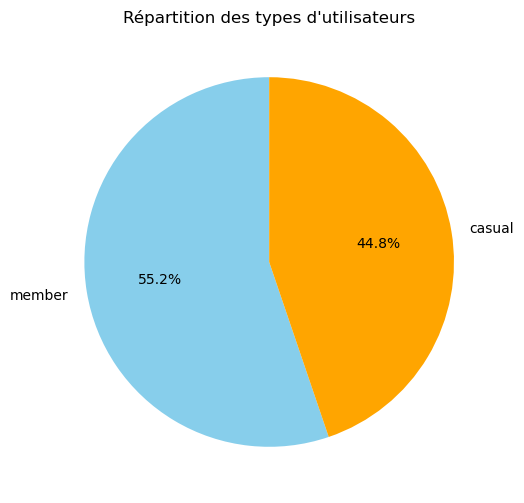

In [7]:
import matplotlib.pyplot as plt

user_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['skyblue', 'orange'])
plt.title("Répartition des types d'utilisateurs")
plt.ylabel("") 
plt.show()


In [8]:
# - Y a-t-il un type de vélo préféré par les différents types d'utilisateurs ?
bike_user_counts = df_janvier_2021.groupby(['user_type', 'bike_type']).size().unstack()
print(bike_user_counts)


bike_type  classic_bike  docked_bike  electric_bike
user_type                                          
casual          1248378       309935         469384
member          1951661            1         548953


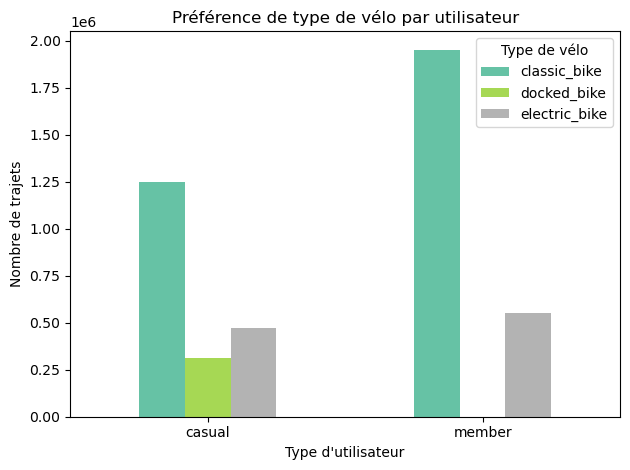

In [9]:
bike_user_counts.plot(kind='bar', stacked=False, colormap='Set2')
plt.title("Préférence de type de vélo par utilisateur")
plt.xlabel("Type d'utilisateur")
plt.ylabel("Nombre de trajets")
plt.xticks(rotation=0)
plt.legend(title='Type de vélo')
plt.tight_layout()
plt.show()


In [10]:
#- Quel type de vélo a la durée de trajet la plus longue entre les utilisateurs ?
avg_duration = df_janvier_2021.groupby(['user_type', 'bike_type'])['ride_duration_min'].mean().unstack()
print(avg_duration)


bike_type  classic_bike  docked_bike  electric_bike
user_type                                          
casual        26.220295    73.178646      20.138431
member        13.720107     2.633333      12.173500


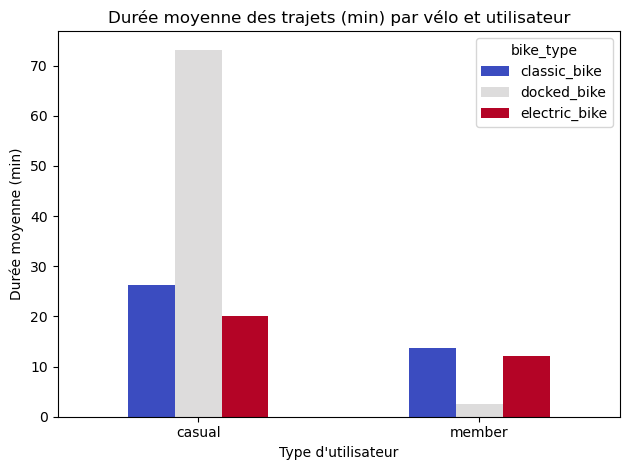

In [11]:
avg_duration.plot(kind='bar', colormap='coolwarm')
plt.title("Durée moyenne des trajets (min) par vélo et utilisateur")
plt.ylabel("Durée moyenne (min)")
plt.xlabel("Type d'utilisateur")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
#- Quelle est la durée moyenne des trajets par type d'utilisateur ?
df_janvier_2021.groupby('user_type')['ride_duration_min'].mean()


user_type
casual    31.990046
member    13.380581
Name: ride_duration_min, dtype: float64

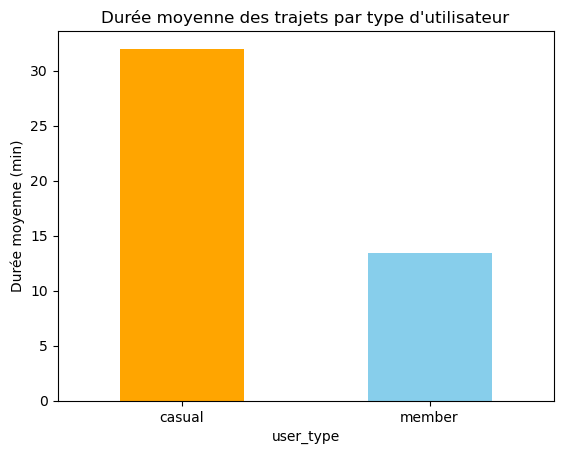

In [13]:
df_janvier_2021.groupby('user_type')['ride_duration_min'].mean().plot(kind='bar', color=['orange', 'skyblue'])
plt.title("Durée moyenne des trajets par type d'utilisateur")
plt.ylabel("Durée moyenne (min)")
plt.xticks(rotation=0)
plt.show()


In [14]:
#- Quelle est la distance moyenne parcourue par type d'utilisateur ?
df_janvier_2021.groupby('user_type')['distance_travelled_km'].mean()


user_type
casual    2.202311
member    2.119294
Name: distance_travelled_km, dtype: float64

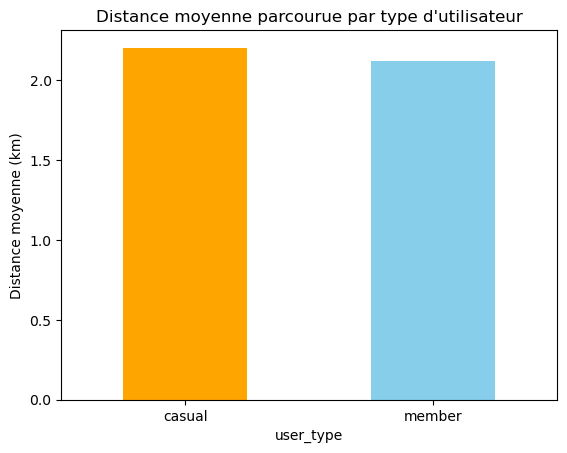

In [15]:
df_janvier_2021.groupby('user_type')['distance_travelled_km'].mean().plot(kind='bar', color=['orange', 'skyblue'])
plt.title("Distance moyenne parcourue par type d'utilisateur")
plt.ylabel("Distance moyenne (km)")
plt.xticks(rotation=0)
plt.show()


In [16]:
#- Quels jours sont les plus actifs pour les utilisateurs ?
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_usage = df_janvier_2021.groupby(['day_of_week', 'user_type']).size().unstack().reindex(day_order)
day_usage


user_type,casual,member
day_of_week,,
Monday,226589,341083
Tuesday,212784,382456
Wednesday,215966,391946
Thursday,222037,368008
Friday,287170,360145
Saturday,463636,351123
Sunday,399515,305854


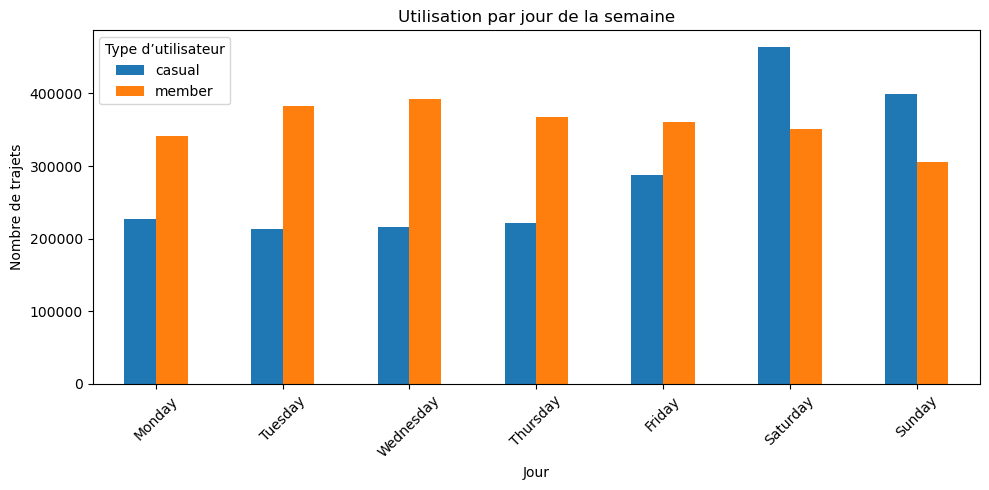

In [17]:
day_usage.plot(kind='bar', figsize=(10,5))
plt.title("Utilisation par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre de trajets")
plt.legend(title='Type d’utilisateur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
#- Quels mois ou quelles saisons de l'année les utilisateurs ont tendance à utiliser le service de partage de vélos ?
# Par mois
month_usage = df_janvier_2021.groupby(['month', 'user_type']).size().unstack()

# Par saison
season_usage = df_janvier_2021.groupby(['season', 'user_type']).size().unstack()


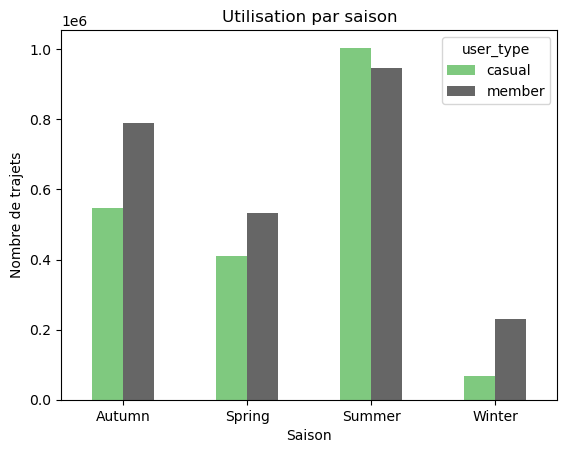

In [19]:
season_usage.plot(kind='bar', colormap='Accent')
plt.title("Utilisation par saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de trajets")
plt.xticks(rotation=0)
plt.show()


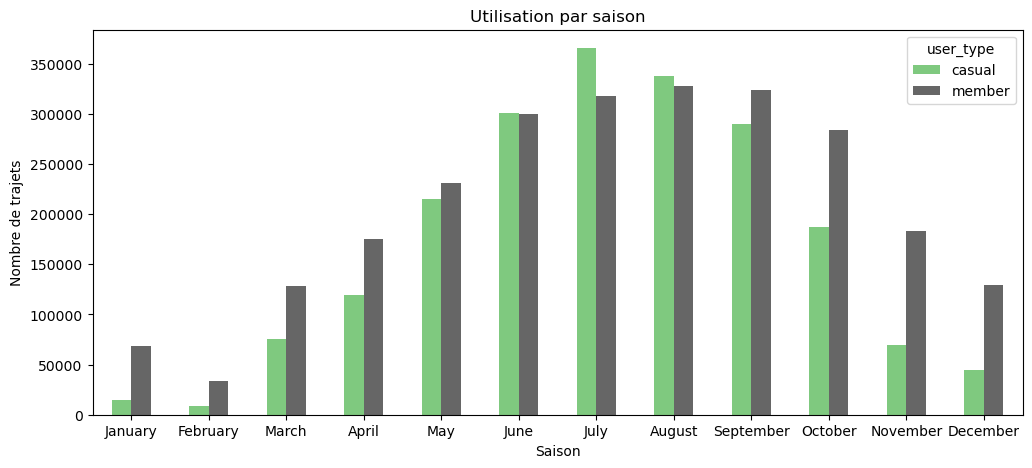

In [20]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_usage.reindex(month_order).plot(kind='bar', colormap='Accent', figsize=(12,5))
plt.title("Utilisation par saison")
plt.xlabel("Saison")
plt.ylabel("Nombre de trajets")
plt.xticks(rotation=0)
plt.show()


In [21]:
#- Quel type d'utilisateur a le plus grand nombre de trajets aller-retour et de trajets aller simple effectués ?
route_usage = df_janvier_2021.groupby(['route_type', 'user_type']).size().unstack()
print(route_usage)


user_type      casual   member
route_type                    
One-way trip  1821332  2426879
Round-rip      206365    73736


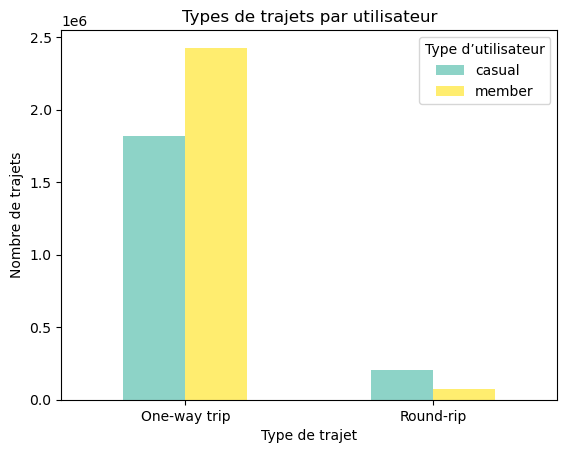

In [22]:
route_usage.plot(kind='bar', colormap='Set3')
plt.title("Types de trajets par utilisateur")
plt.xlabel("Type de trajet")
plt.ylabel("Nombre de trajets")
plt.xticks(rotation=0)
plt.legend(title='Type d’utilisateur')
plt.show()



---


## Phase 3 : Cartographie et recommendation d'implémentation physique

En plus de fournir une analyse complète qui vous permettra d'appuyer vos choix des recommendations à faire à l'entreprise, **prenez soin d'indiquer précisément où est meilleur de s'implanter.**

N'oubliez pas que les investisseurs, qui veulent bien placer leur argent, ne manqueront pas de soulever des points précis, pour s'assurer que votre activité soit rentable à coups sûr.  

**Dans le dataset, vous trouverez les coordonnées des stations de départ et d'arrivées.**

Comme dis plus haut, soyez créatif !   

Ne manquez pas d'étoffer vos arguments, et d'être étincelant le jour J ;)

In [26]:
start_counts = df_janvier_2021.groupby('start_station_name').size()
end_counts = df_janvier_2021.groupby('end_station_name').size()

station_balance = pd.DataFrame({
    'departures': start_counts,
    'arrivals': end_counts
}).fillna(0)

station_balance['balance'] = station_balance['arrivals'] - station_balance['departures']

station_balance.sort_values(by='balance', ascending=False)

,departures,arrivals,balance
Sheffield Ave & Waveland Ave,18890.0,22971.0,4081.0
Lake Shore Dr & North Blvd,22704.0,26068.0,3364.0
DuSable Lake Shore Dr & North Blvd,23123.0,26026.0,2903.0
Streeter Dr & Grand Ave,79197.0,80687.0,1490.0
Kedzie Ave & Milwaukee Ave,9416.0,10848.0,1432.0
...,...,...,...
Wells St & Walton St,9334.0,7945.0,-1389.0
Field Museum,8228.0,6803.0,-1425.0
Desplaines St & Kinzie St,24379.0,22755.0,-1624.0
Orleans St & Merchandise Mart Plaza,18484.0,16774.0,-1710.0


In [28]:
occasional = df_janvier_2021[df_janvier_2021['user_type'] == 'casual']

# Exemple : top 10 des lieux de fin de trajet des cyclistes occasionnels
occasional_stops = occasional.groupby(['end_lat', 'end_lng']).size().reset_index(name='count')
occasional_stops = occasional_stops.sort_values('count', ascending=False)

occasional_stops

,end_lat,end_lng,count
179575,41.892278,-87.612043,57649
279304,41.911722,-87.626804,28678
85570,41.880958,-87.616743,27796
334084,41.926277,-87.630834,19199
87495,41.881032,-87.624084,18145
...,...,...,...
151130,41.889878,-87.636622,1
151129,41.889878,-87.671567,1
151128,41.889878,-87.671580,1
151127,41.889878,-87.634846,1




---


## Livrables attendus

Les investisseurs souhaitent une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Arguments
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- Votre tableau de bord contient des graphiques
- Votre tableau de bord contient au moins une visualisation de données interactive
- Votre tableau de bord contient au moins une carte représentant des informations géographiques
- Votre tableau de bord contient au moins un tableau croisé
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel)
- Réponse aux questions métiers en conclusion :
  1. **Quelles sont les recommandations pour Cyclistic afin d'augmenter leur taux de clientèle, en se concentrant particulièrement sur le ciblage de leurs offres proposées et en exploitant les habitudes d'utilisation des clients ainsi que les préférences pour les vélos?**
  2. **Quel est le meilleur emplacement pour installer de nouvelles stations en se basant sur les habitudes d'utilisation des clients, les saisons et les stations les plus fréquentées ?**


Vous devrez faire **une présentation dans un premier temps sous slides**, qui contient au minimum **le contexte, la problématique, ainsi que la conclusion qui contient vos ARGUMENTS pour retenir l'attention des investisseurs. Aussi, vous utiliserez un dashboard pour convaincre les investisseurs, pour qu'ils puissent visualiser votre analyse et vos arguments.**

**Pour rappel, l'argumentation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise.**

Les investisseurs ne sont pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.

Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.